In [43]:
import re
from operator import add
import matplotlib.pyplot as plt
%matplotlib inline


In [44]:
rdd = sc.textFile('words.txt')
print 'number of lines in file: %s' % rdd.count()

number of lines in file: 65


In [45]:
chars = rdd.map(lambda x:	len(x)).reduce(add)

In [46]:
print 'number of characters in file: %s' % chars

number of characters in file: 6387


In [47]:
words = rdd.flatMap(lambda line: re.split("\W+", line.lower().strip())).filter(lambda word: len(word) > 2).map(lambda word: (word,1))

In [48]:
words = words.reduceByKey(add).map(lambda count: (count[1], count[0])).sortByKey(False)

In [49]:
words.take(5)

[(43, u'the'), (26, u'type'), (22, u'that'), (18, u'and'), (14, u'dot')]

In [53]:
def histogram(words):
    count = map(lambda x: x[1], words) 
    word = map(lambda x: x[0], words) 
    plt.barh(range(len(count)), count, color = 'red')
    plt.yticks(range(len(count)), word)

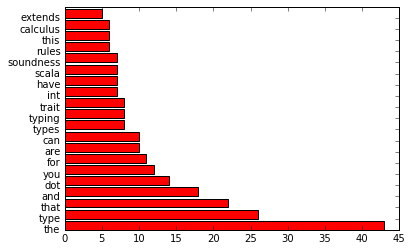

In [56]:
histogram(words.map(lambda x: (x[1],x[0])).take(20))

NameError: name 'histogram' is not defined